In [14]:
"""
Creates a randomized influence network and simulates over all possible initial configs
Learns the influence network edge weights using global learner for each node - assumes partial observations given
Prints train/test error rate for entire network

"""
import DataGen
import PartialObservationLearner
import FullObservationLearner
import importlib
import numpy as np
import matplotlib.pyplot as plt


In [2]:
importlib.reload(DataGen)
data = DataGen.smhData()


In [ ]:
importlib.reload(PartialObservationLearner)
layers = [*range(0,5)]

test_err_data = []
train_err_data = []
naive0_err_data = []
#naive1_err_data = []

for layer in layers:
    
    (train_err, test_err, naive0_err, naive1_err) = PartialObservationLearner.learn(input_data=data, test_size = 0.25, num_layers = layer, fraction=1.0)
    
    test_err_data.append(test_err)
    train_err_data.append(train_err)
    naive0_err_data.append(naive0_err)
    #naive1_err_data.append(naive1_err)
    

Text(0, 0.5, 'Error Rate')

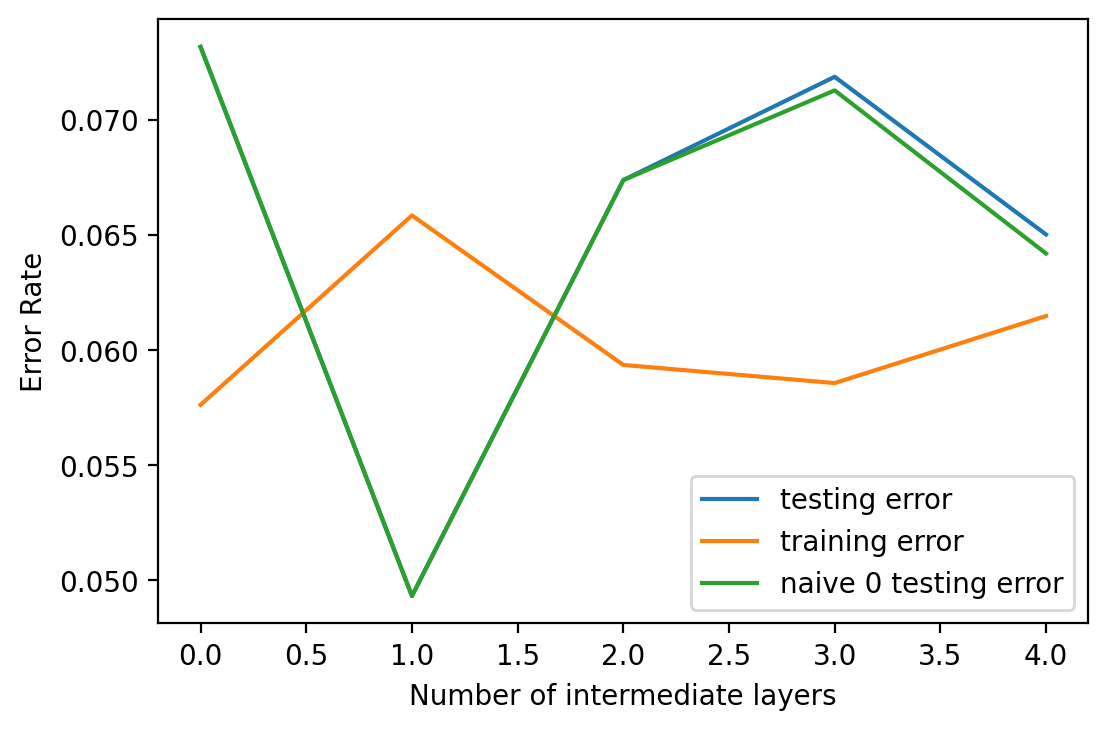

In [19]:
plt.rcParams['figure.dpi'] = 200
plt.plot(layers, test_err_data, label = 'testing error')
plt.plot(layers,train_err_data, label='training error')
plt.plot(layers, naive0_err_data, label = 'naive 0 testing error')
#plt.plot(layers,naive1_err_data, label='naive 1 training error')
plt.legend(loc="lower right")
plt.xlabel("Number of intermediate layers")
plt.ylabel("Error Rate")



In [ ]:
N = 1695

train_errs = []
test_errs = []
naive0_errs = []
naive1_errs = []

update_steps = int(N/100)

importlib.reload(FullObservationLearner)
for i in range(N):
    
    if i % update_steps == 0:
        print(f'{(i/N)*100} % done')
    
    
    (train_err, test_err, naive_0_err, naive_1_err) = FullObservationLearner.learn(node=i, input_data=data, test_size=0.25, fraction=1.0)
    train_errs.append(train_err)
    test_errs.append(test_err)
    naive0_errs.append(naive_0_err)
    naive1_errs.append(naive_1_err)
        

In [22]:
mean_train_err = sum(train_errs) / len(train_errs)
mean_test_err = sum(test_errs) / len(test_errs)
mean_naive0_err = sum(naive0_errs) / len(train_errs)
mean_naive1_err = sum(naive1_errs) / len(test_errs)
    
print(f'mean test err: {mean_test_err}')
print(f'mean train err: {mean_train_err}')
print(f'mean naive_0 err: {mean_naive0_err}')
print(f'mean naive_1 err: {mean_naive1_err}')

mean test err: 6.93755158759183e-05
mean train err: 3.896110056739092e-05
mean naive_0 err: 0.05854080655211896
mean naive_1 err: 0.9414591934478793
